In [1]:
import glob
import numpy as np
import fuvpy as fuv
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning) # Turn of all the warnings when np.where contains NaNs.

Import the sample images to a Dataset and remove background emmisions

In [2]:
path = '../sample_wicfiles/'
wicfiles = glob.glob(path + '*.idl')
wic = fuv.read_idl(wicfiles,dzalim=75)
wic = wic.fuv.backgroundmodel_BS(tOrder=0).fuv.backgroundmodel_SH(3,3,tOrder=0)

The auroral boundaries are first detected along 24 latitudinal meridians

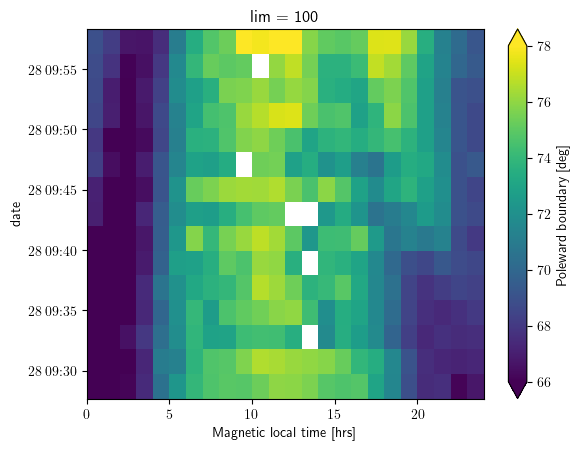

In [3]:
bi = wic.fuv.detect_boundaries()
bi['pb'].sel(lim=100).plot(vmin=66,vmax=78)

The initial boundaries are used to make models of the boundary locations. The main model is based on B-splines in longitude and time

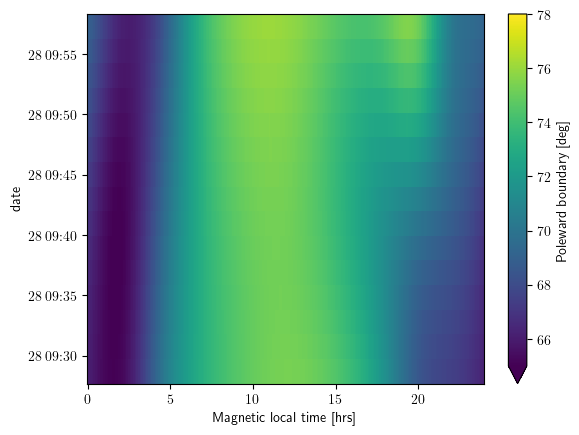

In [4]:
bmBS = bi.fuv.boundarymodel_BS(tLeb=1e0,tLpb=1e0)
bmBS['pb'].plot(vmin=65,vmax=78)

There is also an alternative model based on a Fourier series in longitude and B-splines in time

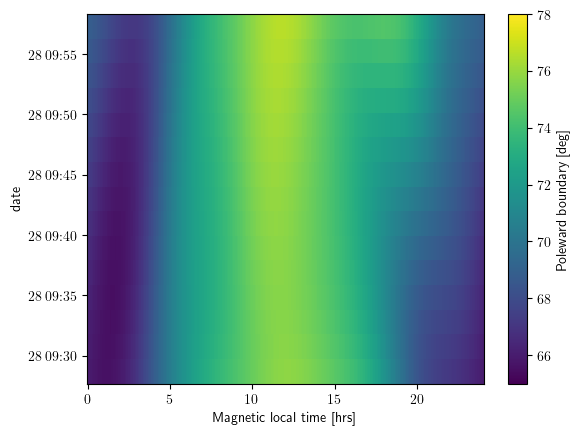

In [5]:
bmF = bi.fuv.boundarymodel_F(tLeb=1e0,tLpb=1e0,Leb=1e0,Lpb=1e0)
bmF['pb'].plot(vmin=65,vmax=78)

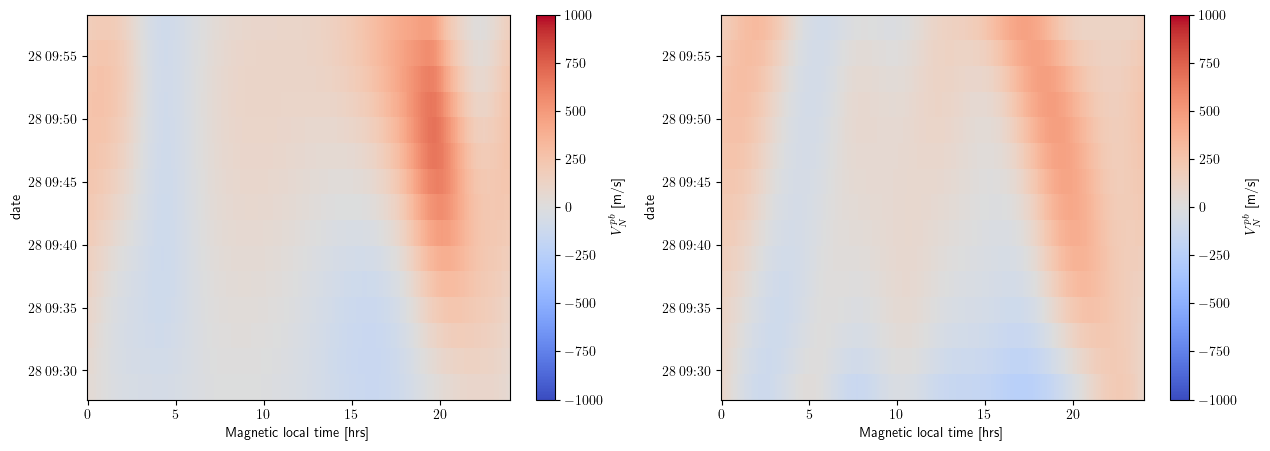

In [6]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
bmBS['vn_pb'].plot(ax=axs[0],vmin=-1000,vmax=1000,cmap='coolwarm')
bmF['vn_pb'].plot(ax=axs[1],vmin=-1000,vmax=1000,cmap='coolwarm')

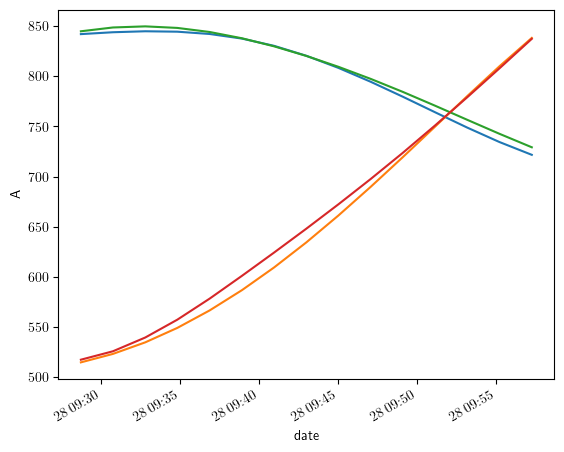

In [7]:
bmBS['P'] = 1e-6*np.deg2rad(15*0.1)*bmBS['dP'].sum(dim='mlt')
bmBS['A'] = 1e-6*np.deg2rad(15*0.1)*bmBS['dA'].sum(dim='mlt')
bmF['P'] = 1e-6*np.deg2rad(15*0.1)*bmF['dP'].sum(dim='mlt')
bmF['A'] = 1e-6*np.deg2rad(15*0.1)*bmF['dA'].sum(dim='mlt')
fig,ax=plt.subplots()
bmBS['P'].plot(ax=ax)
bmBS['A'].plot(ax=ax)
bmF['P'].plot(ax=ax)
bmF['A'].plot(ax=ax)

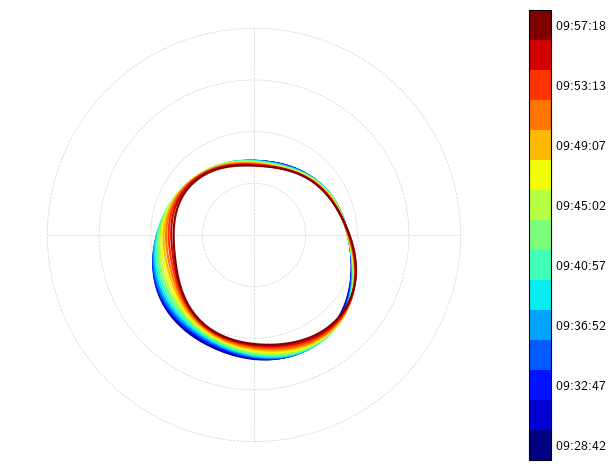

In [8]:
fuv.ppBoundaries(bmF,'pb')